# Import libraries and Dataset

In [1]:
# Importing libraries
import pandas as pd 
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Descriptive Statistics

In [2]:
dataset = pd.read_csv('pima-indians-diabetes.data.csv')
dataset


,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Preview data
dataset.head()

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [5]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
# Count of null values
dataset.isnull().sum()

preg     0
 plas    0
pres     0
Skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

# Data Visualization

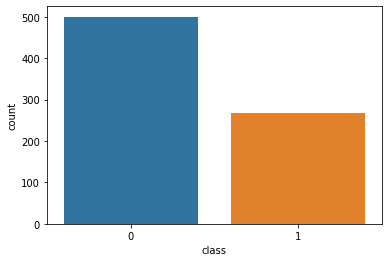

In [7]:
# Outcome countplot
sns.countplot(x = 'class',data = dataset)

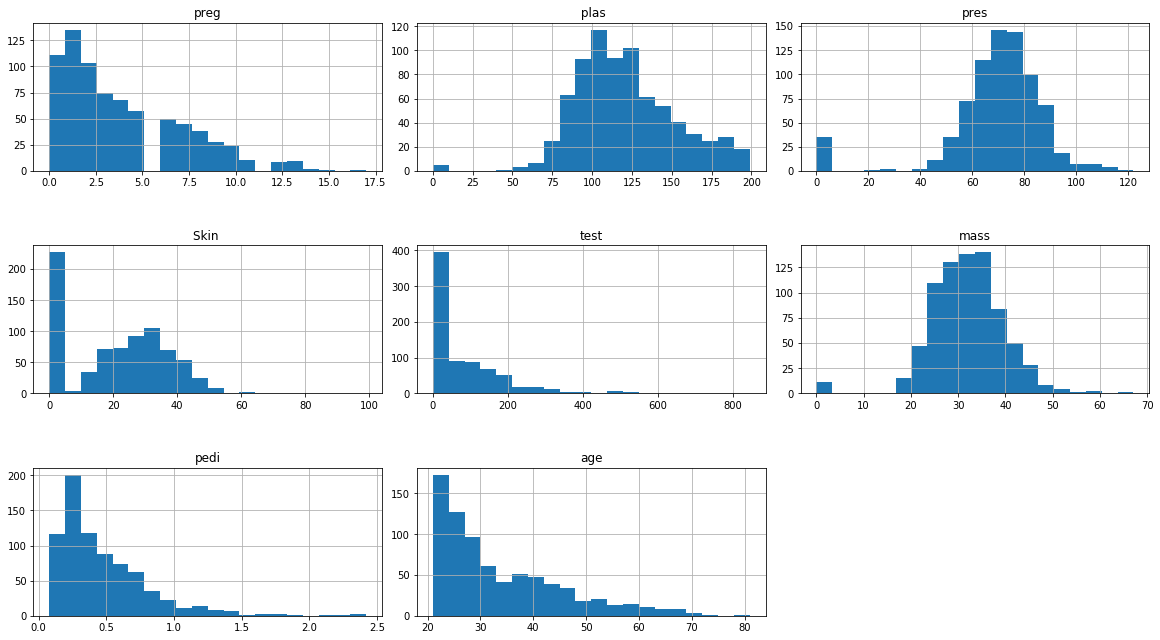

In [8]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

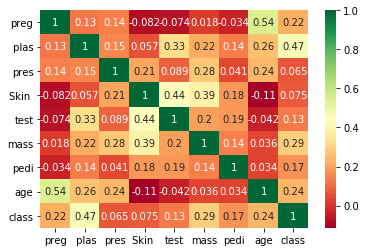

In [9]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True,cmap ='RdYlGn')
plt.show()

# Data Preprocessing

In [10]:
dataset_new = dataset

In [11]:
# Replacing zero values with NaN
dataset_new[["age", "pres", "preg", "test", "mass"]] = dataset_new[["age", "pres", "preg", "test", "mass"]].replace(0, np.NaN) 

In [12]:
# Count of NaN
dataset_new.isnull().sum()

preg     111
 plas      0
pres      35
Skin       0
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [13]:
dataset_new["age"].fillna(dataset_new["age"].mean(), inplace = True)
dataset_new["pres"].fillna(dataset_new["pres"].mean(), inplace = True)
dataset_new["preg"].fillna(dataset_new["preg"].mean(), inplace = True)
dataset_new["test"].fillna(dataset_new["test"].mean(), inplace = True)
dataset_new["mass"].fillna(dataset_new["mass"].mean(), inplace = True)

In [14]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,4.494673,2.975395,1.000,2.00000,4.494673,6.000000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.000000,140.250000,199.00
pres,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.000000,32.000000,99.00
test,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
mass,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [15]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [16]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [17]:
# Selecting features 
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [18]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['class'] )

In [19]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


In [20]:
from joblib import dump
dump(sc,"scalar1.save")

['scalar1.save']

# Data Modelling

In [32]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=24, p=2,
           weights='uniform')

In [34]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)

In [35]:
import pickle
pickle.dump(knn,open('decision1.pkl','wb'))

In [36]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

In [37]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))


Logistic Regression: 72.72727272727273
K Nearest neighbors: 75.97402597402598


# Model Evaluation

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[87, 13],
       [24, 30]], dtype=int64)

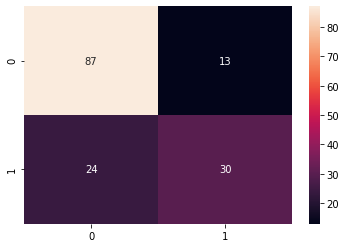

In [39]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [40]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       100
         1.0       0.70      0.56      0.62        54

   micro avg       0.76      0.76      0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [41]:
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)

In [42]:
accuracy_knn *100

75.97402597402598